In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install git+https://github.com/demetriomagatti/bioinformatics_basics.git@main

  Cloning https://github.com/demetriomagatti/bioinformatics_basics.git (to revision main) to /tmp/pip-req-build-h_t0y6nl
  Running command git clone -q https://github.com/demetriomagatti/bioinformatics_basics.git /tmp/pip-req-build-h_t0y6nl
Note: you may need to restart the kernel to use updated packages.


### Example

In [4]:
from bioinformatics_basics import alignment
solver = alignment.ManhattanSolver(nrows=5,ncols=5,MaxScore=10)

Initialized module


In [5]:
# matrix containing scores for "to nord" movements
solver.MoveNord

array([[8., 3., 9., 4., 9.],
       [1., 4., 3., 8., 9.],
       [0., 2., 5., 2., 8.],
       [7., 0., 4., 9., 3.]])

In [6]:
# matrix containing scores for "to east" movements
solver.MoveEast

array([[5., 6., 5., 2.],
       [6., 9., 1., 0.],
       [4., 8., 7., 0.],
       [5., 9., 2., 6.],
       [0., 0., 2., 0.]])

In [7]:
# matrix containing maximum score to a vertex - empty before running
solver.Score

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
# moves to maximize score to a vertex - empty before running
solver.Moves

{}

In [9]:
solver.run()

In [10]:
# matrix containing maximum score to a vertex
solver.Score

array([[ 0.,  5., 11., 16., 18.],
       [ 8., 14., 23., 24., 27.],
       [ 9., 18., 26., 33., 36.],
       [ 9., 20., 31., 35., 44.],
       [16., 20., 35., 44., 47.]])

In [11]:
# moves to maximize score to the final vertex
solver.Moves[list(solver.Moves.keys())[-1]]

['East', 'East', 'East', 'East', 'Nord', 'Nord', 'Nord', 'Nord']

<AxesSubplot:>

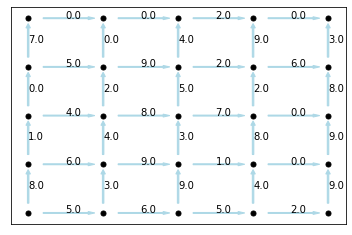

In [12]:
# visual check
solver.visualize()